In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as sts

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
n = 100
actual = np.array([22, 53, 25])
# prob_m = (actual * [2, 1, 0] / (n * 2)).sum()
prob_m = 0.5
prob_i = np.array([prob_m * prob_m, 2 * prob_m * (1 - prob_m), (1 - prob_m) * (1 - prob_m)])
expect = prob_i * n
# chi2_c = ((actual - expect) ** 2 / expect).sum()
sts.chisquare(actual, expect)

Power_divergenceResult(statistic=0.54, pvalue=0.7633794943368533)

In [5]:
n = 100
actual = np.array([22, 33, 45])
prob_m = (actual * [2, 1, 0] / (n * 2)).sum()
prob_i = np.array([prob_m * prob_m, 2 * prob_m * (1 - prob_m), (1 - prob_m) * (1 - prob_m)])
expect = prob_i * n
# chi2_c = ((actual - expect) ** 2 / expect).sum()
# в сложной теореме уменьшаем количество степеней свободы. в даном случае остается только prob_m как независимая величина
# потому оставляем ddof = 1 (dof = k - 1 - ddof)
sts.chisquare(actual, expect, ddof=1)

Power_divergenceResult(statistic=9.189136689774069, pvalue=0.0024345568963482717)

In [6]:
# no expect -- tests for discrete uniform dist
sts.chisquare(actual, ddof=1)

Power_divergenceResult(statistic=7.9399999999999995, pvalue=0.004835383460771927)

In [7]:
1 - sts.chi2.cdf(9.189136689774069, 2)

0.010106582397520603

In [8]:
observed = sts.norm.rvs(0, 1, 100)
observed

array([ 0.13673098, -0.07166001,  1.14158069, -0.72918768,  2.49915947,
        0.91571889,  1.48833492,  0.48811653,  1.37864616,  1.09584196,
       -0.76438221, -0.89487176,  0.64502578, -0.30490654, -1.15803808,
        0.79850357,  0.03343979, -2.13904223,  0.80016972,  1.91986963,
        0.14673721,  1.2704987 ,  0.71971905, -0.66667997,  1.14067926,
        1.58710411, -1.05269471,  1.82529471, -1.21349696,  0.05868032,
        0.56933015, -0.18474935, -1.26089421, -0.19037336,  2.37011442,
        1.1140025 ,  1.39959893,  0.42615074, -1.68670989,  1.03268341,
       -0.34996076,  0.98091835,  0.01628115,  2.60307322, -1.0455606 ,
        0.98954613,  0.96379356, -0.5558761 ,  0.59389231,  0.04525581,
        0.14249779,  0.88029015,  0.93997104, -0.37808216,  0.68952304,
       -0.35132984,  0.60675231, -0.74365931, -0.72147506, -0.44290919,
        0.09499158,  0.37307556, -2.21971663, -0.39829182, -2.51876542,
        0.40676738,  1.54350318, -0.17985468,  0.07801737,  1.33

C:\dev\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


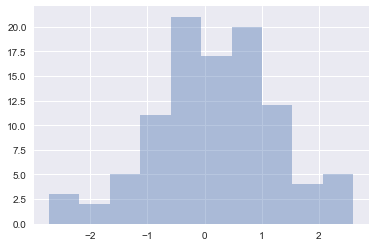

In [9]:
bins = np.histogram(observed, bins='auto')
sns.distplot(observed, bins=bins[1], kde=False)

In [10]:
bins

(array([ 3,  2,  5, 11, 21, 17, 20, 12,  4,  5], dtype=int64),
 array([-2.7228639 , -2.19027019, -1.65767648, -1.12508277, -0.59248906,
        -0.05989534,  0.47269837,  1.00529208,  1.53788579,  2.07047951,
         2.60307322]))

In [11]:
prob_bins = list(bins[1])
prob_bins[0] = -np.inf
prob_bins[-1] = np.inf
prob_bins

[-inf,
 -2.1902701923427417,
 -1.6576764799702302,
 -1.1250827675977189,
 -0.5924890552252076,
 -0.05989534285269604,
 0.47269836951981503,
 1.005292081892326,
 1.5378857942648376,
 2.070479506637349,
 inf]

In [12]:
# для сложных гипотез заменить (0, 1) параметрами получеными из выборки (не _.std())
func = sts.norm(0, 1).cdf
prob_1 = func(prob_bins[:-1])
prob_2 = func(prob_bins[1:])
prob = prob_2 - prob_1
prob

array([0.01425232, 0.03443907, 0.08158559, 0.14648459, 0.19935792,
       0.20566631, 0.16083608, 0.09533984, 0.04283454, 0.01920373])

In [13]:
expected = prob * observed.size
expected

array([ 1.42523236,  3.44390682,  8.15855896, 14.64845924, 19.93579208,
       20.56663104, 16.08360816,  9.53398427,  4.2834539 ,  1.92037316])

In [14]:
# соответственно здесь уменьшаем количество степеней свободы на 2 (ddof=2)
assert bins[0].size == expected.size
sts.chisquare(bins[0], expected)

Power_divergenceResult(statistic=11.701169595776996, pvalue=0.2306849282650228)